# karyo

In [8]:
geno <-read.table("Hetero_realigned_cov10_filtered3.raw", row.names=1, header=T)
colnames(geno)<-1:3928
rownames(geno)<-1:240
x <- as.matrix(geno)-1 
pheno <- read.csv("2017heteroPheno.csv", header=T)
attach(pheno)

The following objects are masked from pheno (pos = 4):

    bcw, gill, i5, i7, length, no, tank, vili, X



In [9]:
library("synbreed")
pheno=data.frame(id=1:240,pheno=pheno$bcw)
lin_map<-read.table("./raw.map")
colnames(lin_map)<-c("chr","pos")
rownames(lin_map)<-colnames(x)
gp<-create.gpData(pheno=pheno,geno=geno,map=lin_map)

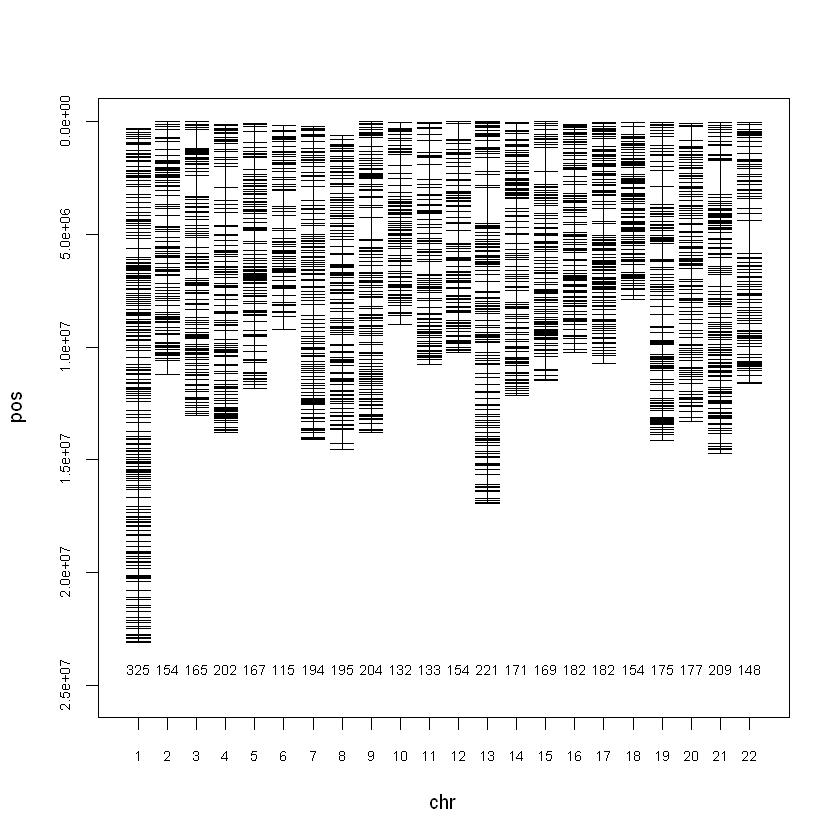

In [144]:
f(gp,nMarker=TRUE)

In [164]:
d.markers<-300

In [165]:
pheno <- read.csv("2017heteroPheno.csv", header=T)
attach(pheno)
geno <-read.table("Hetero_realigned_cov10_filtered3.raw", row.names=1, header=T)
colnames(geno)<-1:3928
rownames(geno)<-1:240
lin_map<-read.table("raw.map")
lin_map["id"]=1:3928
m<-lin_map[order(lin_map$V2),]
sortM<-m[order(m$V1),]
sortgeno<-geno[,sortM$id]
colnames(sortgeno)<-1:3928
x <- as.matrix(sortgeno)-1   

The following objects are masked from pheno (pos = 3):

    bcw, gill, i5, i7, length, no, tank, vili, X

The following objects are masked from pheno (pos = 4):

    bcw, gill, i5, i7, length, no, tank, vili, X

The following objects are masked from pheno (pos = 5):

    bcw, gill, i5, i7, length, no, tank, vili, X

The following objects are masked from pheno (pos = 6):

    bcw, gill, i5, i7, length, no, tank, vili, X

The following objects are masked from pheno (pos = 7):

    bcw, gill, i5, i7, length, no, tank, vili, X

The following objects are masked from pheno (pos = 8):

    bcw, gill, i5, i7, length, no, tank, vili, X

The following objects are masked from pheno (pos = 9):

    bcw, gill, i5, i7, length, no, tank, vili, X

The following objects are masked from pheno (pos = 12):

    bcw, gill, i5, i7, length, no, tank, vili, X



In [166]:
library("BGLR")
fmBB=BGLR(y=sqrt(bcw+1),ETA=list(list(X=x,model='BayesB')),nIter=2000,burnIn=1000,saveAt='BB_')
bhat<-matrix(nrow=2,ncol=3928)
bhat[1,]<-seq.int(1,3928,1)
bhat[2,]<-fmBB$ETA[[1]]$b
bhat_sorted <- bhat[,order(abs(bhat[2,]),decreasing = TRUE)]
xn<-sortgeno[ ,bhat_sorted[1,1:d.markers][order(bhat_sorted[1,1:d.markers])]]


#--------------------------------------------------------------------#
#        _\\|//_                                                     #
#       (` o-o ')      BGLR v1.0.5                                   #
#------ooO-(_)-Ooo---------------------------------------------------#
#                      Bayesian Generalized Linear Regression        #
#                      Gustavo de los Campos, gdeloscampos@gmail.com #
#    .oooO     Oooo.   Paulino Perez-Rodriguez, perpdgo@gmail.com    #
#    (   )     (   )   Agust, 2016                                   #
#_____\ (_______) /_________________________________________________ #
#      \_)     (_/                                                   #
#                                                                    #
#------------------------------------------------------------------- #

  R2 in LP 1 was missing and was set to 0.5
  DF in LP 1 was missing and was set to 5
  probIn in LP 1 was missing and was set to 0.5
  Counts in 

In [167]:
pheno=data.frame(id=1:240,pheno=pheno$bcw)
lin_map<-read.table("./raw.map")
lin_map_xn<-lin_map[bhat_sorted[1,1:d.markers][order(bhat_sorted[1,1:d.markers])],]
colnames(lin_map_xn)<-c("chr","pos")
rownames(lin_map_xn)<-colnames(xn)
gp2<-create.gpData(pheno=pheno,geno=xn,map=lin_map_xn)

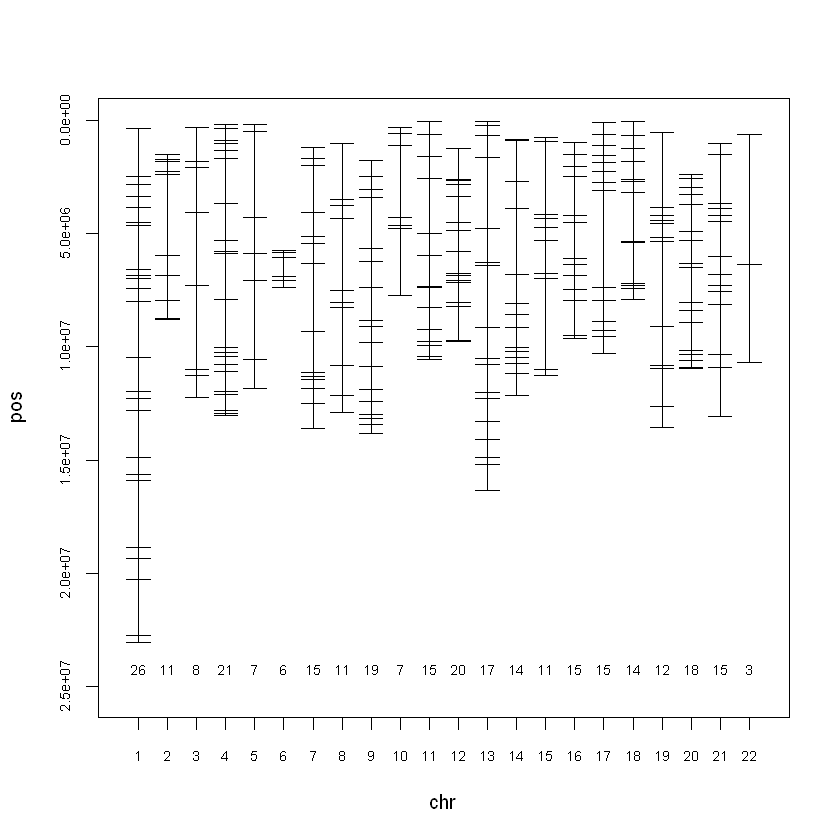

In [168]:
f(gp2,nMarker=TRUE)

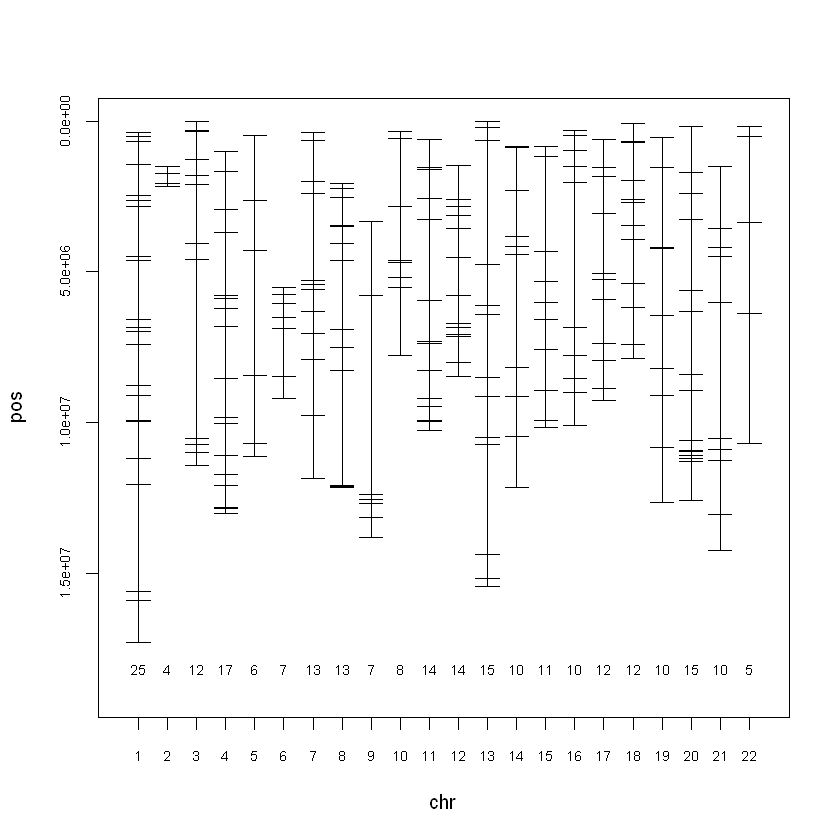

In [155]:
f(gp2,nMarker=TRUE)

In [123]:
f<-function (map, dense = FALSE, nMarker = TRUE, bw = 1, centr = NULL, 
    file = NULL, fileFormat = "pdf", ...) 
{
    oldPar <- par()
    if (!is.null(file)) {
        if (substr(file, nchar(file) - nchar(fileFormat) + 1, 
            nchar(file)) != fileFormat | nchar(file) < 5) 
            file <- paste(file, ".", fileFormat, sep = "")
        if (fileFormat == "pdf") 
            pdf(file)
        else if (fileFormat == "png") 
            png(file)
        else stop("not supported file format choosen!")
    }
    if (class(map)[1] == "gpData") {
        map.unit <- map$info$map.unit
        map <- map$map
    }
    else map.unit <- "unit"
    class(map) <- "data.frame"
    chr <- unique(map$chr)
    chr <- chr[!is.na(chr)]
    if (class(map$chr) == "factor") 
        bord <- "transparent"
    else bord <- NULL
    map <- map[!is.na(map$chr), ]
    if (class(map$chr) == "character") 
        map$chr <- as.factor(map$chr)
    if (!is.null(centr)) 
        if (centr == "maize") 
            centr <- c(134.7, 93.8, 100.2, 105.7, 105.75, 49.8, 
                58.55, 50.2, 72.55, 51.25)
    if (!is.null(centr)) 
        map$pos <- map$pos - centr[map$chr]
    if (dense) 
        layout(matrix(2:1, ncol = 2), widths = c(0.82, 0.25))
    cols <- c("#FCBBA1", "#FC9272", "#FB6A4A", "#EF3B2C", "#CB181D", 
        "#99000D")
    if (dense) {
        x.grid <- y.grid <- list()
        maxDens <- 0
        for (i in seq(along = chr)) {
            start <- min(map$pos[map$chr == chr[i]], na.rm = TRUE)
            end <- max(map$pos[map$chr == chr[i]], na.rm = TRUE)
            x.grid[[i]] <- seq(from = start, to = end, by = bw)
            if (length(x.grid[[i]]) > 10000) 
                warning("large discrepancy between map length and bandwith, maybe choose a larger value for 'bw'")
            y.grid[[i]] <- rep(NA, length(x.grid))
            for (j in seq(along = x.grid[[i]])) {
                y.grid[[i]][j] <- sum(map$pos[map$chr == chr[i]] >= 
                  x.grid[[i]][j] - bw/2 & map$pos[map$chr == 
                  chr[i]] <= x.grid[[i]][j] + bw/2)
                if (y.grid[[i]][j] > maxDens) 
                  maxDens <- y.grid[[i]][j]
            }
        }
    }
    if (dense) {
        par(mar = c(5, 2.8, 4, 3.8) + 0.1)
        shift <- (seq(from = 0, to = maxDens, length = 7)[2] - 
            seq(from = 0, to = maxDens, length = 7)[1])/2
        image(seq(-0.3, 0.3, length = 20), seq(from = shift, 
            to = maxDens, length = 6), matrix(rep(seq(from = shift, 
            to = maxDens, length = 6), 20), nrow = 20, byrow = TRUE), 
            col = cols, breaks = round(seq(0, maxDens, length = 7)), 
            axes = FALSE, xlab = "", main = paste("Nr. of SNPs \n within", 
                bw, map.unit), xlim = c(-0.3, 0.3))
        box()
        axis(side = 4, at = round(seq(from = 0, to = maxDens, 
            length = 7)) + seq(0, shift, length = 7), labels = round(seq(from = 0, 
            to = maxDens, length = 7)), las = 1)
        par(mar = c(5, 4, 4, 1) + 0.1)
    }
    if (!is.null(centr)) {
        plot(map, type = "n", xaxt = "n", xlim = c(0.5, length(chr) + 
            0.5), border = bord, ylim = c(max(map$pos, na.rm = TRUE) * 
            1.1, min(map$pos, na.rm = TRUE)), axes = FALSE, ...)
    }
    else {
        par(cex.axis = 0.7)
        plot(map, type = "n", xaxt = "n", xlim = c(0.5, length(chr) + 
            0.5),border = bord, ylim = c(max(map$pos, na.rm = TRUE) * 
            1.1, min(map$pos, na.rm = TRUE)), ...)
    }
    axis(side = 1, at = seq(along = chr), labels = chr)
    if (!is.null(centr)) {
        box()
        axis(side = 2, at = -seq(-round(max(map$pos, na.rm = TRUE), 
            -2), round(max(map$pos, na.rm = TRUE), -2), by = 25), 
            labels = abs(-seq(-round(max(map$pos, na.rm = TRUE), 
                -2), round(max(map$pos, na.rm = TRUE), -2), by = 25)), 
            las = 1)
    }
    for (i in seq(along = chr)) {
        if (dense) {
            image(seq(i - 0.35, i + 0.35, length = 20), x.grid[[i]], 
                matrix(rep(y.grid[[i]], 20), nrow = 20, byrow = TRUE), 
                col = cols, breaks = round(seq(0, maxDens, length = 7)), 
                add = TRUE)
            if (!is.null(centr)) {
                polygon(x = c(i - 0.4, i - 0.1, i - 0.1, i - 
                  0.4, i - 0.4), y = c(-10, -1, 1, 10, -10), 
                  col = "white", border = "white")
                polygon(x = c(i + 0.4, i + 0.1, i + 0.1, i + 
                  0.4, i + 0.4), y = c(-10, -1, 1, 10, -10), 
                  col = "white", border = "white")
            }
        }
        else {
            n <- sum(map$chr == chr[i], na.rm = TRUE)
            start <- min(map$pos[map$chr == chr[i]], na.rm = TRUE)
            end <- max(map$pos[map$chr == chr[i]], na.rm = TRUE)
            lines(x = c(i, i), y = c(start, end))
            for (j in 1:n) {
                lines(x = c(i - 0.4, i + 0.4), y = rep(map$pos[map$chr == 
                  chr[i]][j], 2))
            }
        }
        if (nMarker) 
            text(i, max(map$pos, na.rm = TRUE) * 1.05, sum(map$chr == 
                chr[i], na.rm = TRUE),cex=0.7)
    }
    if (!is.null(file)) 
        dev.off()
    oldPar$cin <- oldPar$cra <- oldPar$csi <- oldPar$cxy <- oldPar$din <- oldPar$page <- NULL
    par(oldPar)
}